# Random Forest Classifier - Supervised Learning

In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
with open('out/df_final.pkl', 'rb') as f:
    df = pickle.load(f)

In [4]:
df.head()

,topic_label,type_of_material_Biography,type_of_material_Brief,type_of_material_Correction,type_of_material_Editorial,type_of_material_First Chapter,type_of_material_Interview,type_of_material_Letter,type_of_material_List,type_of_material_News,...,world,would,write,writer,writing,yankee,yankees,yearold,yet,young
0,Lifestyle,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Lifestyle,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Lifestyle,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Politics,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159553,0.0
4,Lifestyle,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [5]:
#Set Random State
random_state = 696

In [6]:
#Separate the features and labels from the original df
features = df.loc[:, df.columns != 'topic_label']
labels = df['topic_label']

### Model one: Default RF model trained on original data

**Start off with exploring the Random Forest Classifier with default parameters:**

In [8]:
#Split the data in to train and test data
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = random_state)

In [9]:
#Initialize and fit the default Random Forest Classifier
clf = RandomForestClassifier(random_state = random_state)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=696)

In [8]:
#Predict test data labels with the trained classifer
preds = clf.predict(X_test)

In [9]:
#Obtain the evaluation metrics for the trained classifier
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average = 'macro')
recall = recall_score(y_test, preds, average = 'macro')
f1 = f1_score(y_test, preds, average = 'macro')

#multi_class = 'ovr' for roc_auc_score is better for imbalance
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class = 'ovr', average = 'macro') 

print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)
print('F1 Score:', f1)
print('ROC/AUC Score:', roc_auc)

Accuracy Score: 0.9309173272933182
Precision Score: 0.9485263515845465
Recall Score: 0.9035452077754095
F1 Score: 0.9245062732228585
ROC/AUC Score: 0.9896394765247493


In [10]:
#5 Fold Cross Validation of Model
cv_clf = RandomForestClassifier(random_state = random_state)
mean_cv_score = cross_val_score(cv_clf, features, labels, cv = 5, scoring = 'roc_auc_ovr').mean()
print('Mean CV Score:', mean_cv_score)

Mean CV Score: 0.9895735365262885


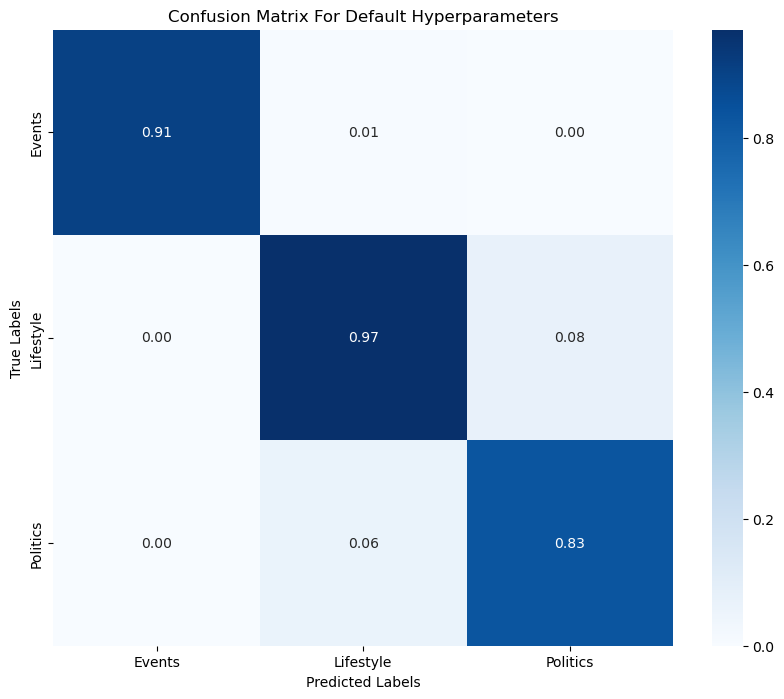

In [11]:
#Visualize results w/ Confusion Matrix
c_matrix = confusion_matrix(y_test, preds)
#Normalized Confusion Matrix
c_matrix = c_matrix / c_matrix.astype(float).sum(axis=1)
#Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c_matrix, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Default Hyperparameters')
plt.show()

Looks like with default hyperparameters all metrics have high scores. However, this could be indicative of overfitting, especially since we have class imbalance present in our data. Next, we will try to address the class imbalance using Synthetic Minority Over-sampling Technique (SMOTE). SMOTE allows us to oversample the minority classes in our imbalanced data to match the samples in the majority class, creating a more balanced data set to train our model on. 

### Model Two: default RF model with SMOTE-processed data

**Balance the data using SMOTE:**

In [13]:
#Use SMOTE to transform features and labels to account for class imbalance
balancer = SMOTE(random_state = random_state)
balanced_features, balanced_labels = balancer.fit_resample(features, labels)

In [14]:
#Create new train/test split with the SMOTE transformed data
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(balanced_features, balanced_labels, 
                                                            random_state = random_state)

In [15]:
#Initialize and fit the default Random Forest Classifier with SMOTE transformed train data
b_clf = RandomForestClassifier(random_state = random_state)
b_clf.fit(X_b_train, y_b_train)

RandomForestClassifier(random_state=696)

In [16]:
#Predict test data labels with the trained classifer
preds = b_clf.predict(X_b_test)

In [17]:
#Obtain the evaluation metrics for the trained classifier
accuracy = accuracy_score(y_b_test, preds)
precision = precision_score(y_b_test, preds, average = 'macro')
recall = recall_score(y_b_test, preds, average = 'macro')
f1 = f1_score(y_b_test, preds, average = 'macro')

roc_auc = roc_auc_score(y_b_test, b_clf.predict_proba(X_b_test), multi_class = 'ovr', average = 'macro') 

print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)
print('F1 Score:', f1)
print('ROC/AUC Score:', roc_auc)

Accuracy Score: 0.9757375241246209
Precision Score: 0.9756948518734808
Recall Score: 0.9756678820925245
F1 Score: 0.9756390601265831
ROC/AUC Score: 0.9986938946152497


In [18]:
#5 Fold Cross Validation of Model
cv_clf = RandomForestClassifier(random_state = random_state)
mean_cv_score = cross_val_score(cv_clf, balanced_features, balanced_labels, cv = 5, scoring = 'roc_auc_ovr').mean()
print('Mean CV Score:', mean_cv_score)

Mean CV Score: 0.998533472927889


Looks like overall after balancing the dataset using SMOTE, the evaluation metrics increased for the default model. To futher optimize model performance, we will now perform hyperparameter tuning using GridSearchCV. This will allow us to test a number of different hyperparameter combinations in order to maximize the f1 score. Once this model has been identified we can further analyze the evaluation metrics and compare to the default model.

### Model Three: RF model with "best" parameters with SMOTE Balanced Data

**Hyperparameter tuning/analysis with SMOTE Balanced Data:**

We chose to focus on the n_estimators and max_features parameters for our hyperparameter tuning. The n_estimators parameter specifies the number of decision trees that are considered when making a classification, and the max_features parameters determines how many features are provided to each decision tree in the random forest. 

In [19]:
parameters = {'n_estimators': np.arange(100,450,50),
              'max_features': ['sqrt', 'log2', None]}

In [20]:
#GridsearchCV to determine best hyper parameters
grid_search = GridSearchCV(clf, parameters, verbose = 1, scoring = 'roc_auc_ovr', cv = 5)
grid_search.fit(X_b_train, y_b_train)
sm_best_model = grid_search.best_estimator_

print('Best parameters:', grid_search.best_params_)
print('Best CV score:', grid_search.best_score_)
print('Best Model:', sm_best_model)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameters: {'max_features': 'log2', 'n_estimators': 400}
Best CV score: 0.9987633258785997
Best Model: RandomForestClassifier(max_features='log2', n_estimators=400, random_state=696)


In [21]:
#Obtain evaluation metrics for best model peformance with test_data
b_preds = sm_best_model.predict(X_b_test)
accuracy = accuracy_score(y_b_test, b_preds)
precision = precision_score(y_b_test, b_preds, average = 'macro')
recall = recall_score(y_b_test, b_preds, average = 'macro')
f1 = f1_score(y_b_test, b_preds, average = 'macro')

roc_auc = roc_auc_score(y_b_test, sm_best_model.predict_proba(X_b_test), multi_class = 'ovr', average = 'macro') 

print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)
print('F1 Score:', f1)
print('ROC/AUC Score:', roc_auc)

Accuracy Score: 0.9809760132340778
Precision Score: 0.9809250415646679
Recall Score: 0.9808990197516511
F1 Score: 0.9809065529801299
ROC/AUC Score: 0.9989576687670055


**Visualize Best Model Metrics**

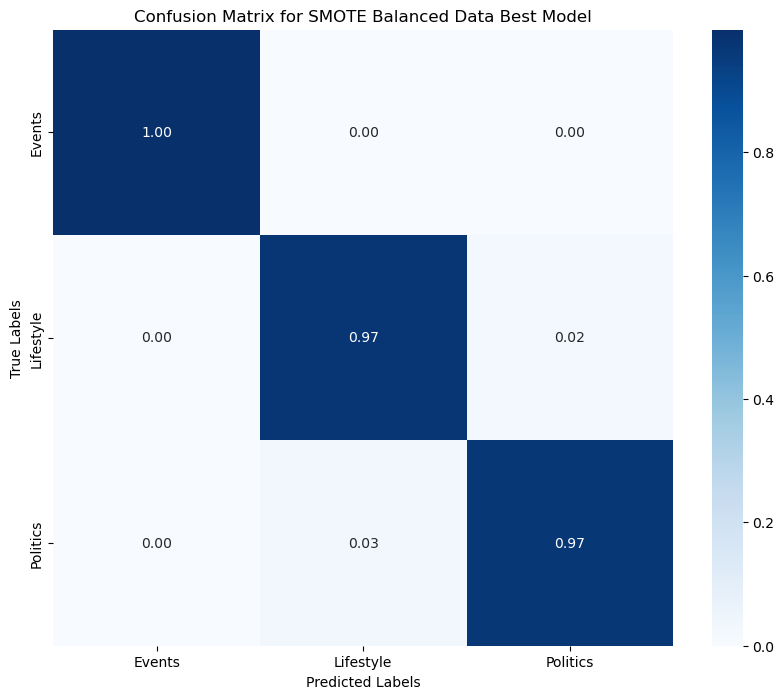

In [22]:
#Visualize results w/ Confusion Matrix
c_matrix = confusion_matrix(y_b_test, b_preds)
#Normalized Confusion Matrix
c_matrix = c_matrix / c_matrix.astype(float).sum(axis=1)
#Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c_matrix, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=sm_best_model.classes_, yticklabels=sm_best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SMOTE Balanced Data Best Model')
plt.show()

After balancing the data using SMOTE and performing hyperparameter tuning, the best Random Forest Classifier model was with n_estimators = 400 and max_features = 'log2'. Compared to the default model, the hyperparameters all increased, and as we can see from the confusion matrix, the proportion of correct predictions for all labels greatly increased.

### Model Four: RF model with "best" parameters with Stratified Data

**Hyperparamter tuning/analysis with Stratified Data Set**

In [23]:
#Get stratified data set
with open("supervised_train_test_data/train_test_data.pkl", "rb") as f:
    data = pickle.load(f)

X_s_train = data['X_train']
X_s_test = data['X_test']
y_s_train = data['y_train']
y_s_test = data['y_test']

In [24]:
clf = RandomForestClassifier(random_state = random_state)

In [25]:
grid_search = GridSearchCV(clf, parameters, verbose = 1, scoring = 'roc_auc_ovr', cv = 5)
grid_search.fit(X_s_train, y_s_train)
st_best_model = grid_search.best_estimator_

print('Best parameters:', grid_search.best_params_)
print('Best CV score:', grid_search.best_score_)
print('Best Model:', st_best_model)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameters: {'max_features': 'log2', 'n_estimators': 400}
Best CV score: 0.9907826825983337
Best Model: RandomForestClassifier(max_features='log2', n_estimators=400, random_state=696)


In [26]:
#Obtain evaluation metrics for best model peformance with test_data
s_preds = st_best_model.predict(X_s_test)
accuracy = accuracy_score(y_s_test, s_preds)
precision = precision_score(y_s_test, s_preds, average = 'macro')
recall = recall_score(y_s_test, s_preds, average = 'macro')
f1 = f1_score(y_s_test, s_preds, average = 'macro')

roc_auc = roc_auc_score(y_s_test, st_best_model.predict_proba(X_s_test), multi_class = 'ovr', average = 'macro') 

print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)
print('F1 Score:', f1)
print('ROC/AUC Score:', roc_auc)

Accuracy Score: 0.9419674451521586
Precision Score: 0.9585314148478382
Recall Score: 0.9020656626446093
F1 Score: 0.9280433355945129
ROC/AUC Score: 0.9929211089570215


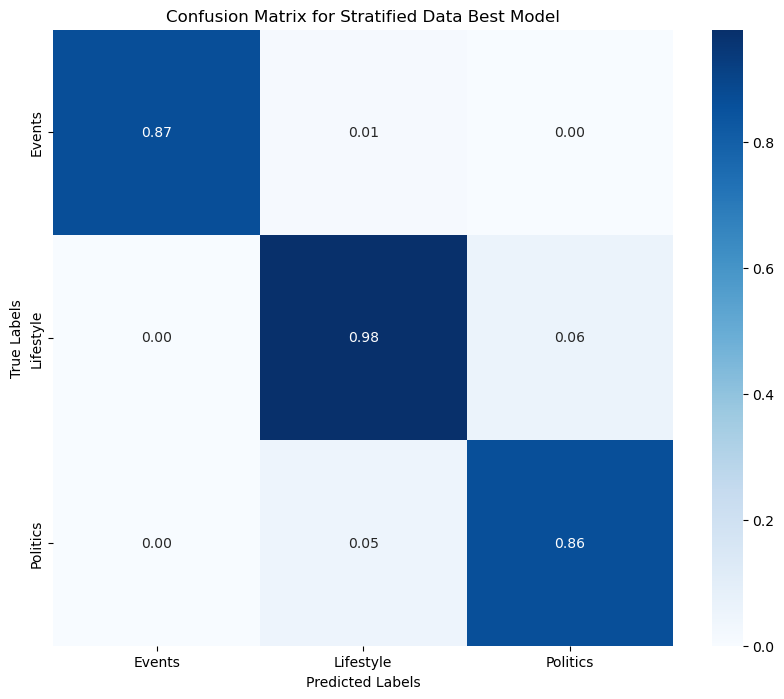

In [27]:
#Visualize results w/ Confusion Matrix
c_matrix = confusion_matrix(y_s_test, s_preds)
#Normalized Confusion Matrix
c_matrix = c_matrix / c_matrix.astype(float).sum(axis=1)
#Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c_matrix, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=st_best_model.classes_, yticklabels=st_best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Stratified Data Best Model')
plt.show()

With the stratified data set the best model was with n_estimators = 400 and max_features = 'log2'. The confusion matrix above shows similar performance for classification of the labels with the original data set and default hyperparameters. 

**Overall Findings**

In summary, using two different balancing methods yielded the same optimal model with differing performance metrics. Overall it seems that balancing the data set using SMOTE provides data and a Random Forest model that performs very well on the test data. 

**Pickle Best Models and SMOTE Balanced Data for Future Use**

In [28]:
#Pickle Best Models
with open("out/best_SMOTE_rf.pkl", "wb") as f:
    pickle.dump(sm_best_model, f)
    
with open("out/best_Stratified_rf.pkl", "wb")as f:
    pickle.dump(st_best_model,f)

In [29]:
#Pickle SMOTE Balanced Data
smote_data = {'X_train': X_b_train, 'X_test': X_b_test, 'y_train': y_b_train, 'y_test': y_b_test}
with open("out/smote_Xtrain.pkl", "wb") as f:
    pickle.dump(smote_data['X_train'], f)
with open("out/smote_Xtest.pkl", "wb") as f:
    pickle.dump(smote_data['X_test'], f)
with open("out/smote_ytrain.pkl", "wb") as f:
    pickle.dump(smote_data['y_train'], f)
with open("out/smote_ytest.pkl", "wb") as f:
    pickle.dump(smote_data['y_test'], f)


**References**
<p>https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb</p>
<p>https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html</p>
<p>https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/</p>
<p>https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/</p>
<p>https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/</p>